<a href="https://colab.research.google.com/github/manuelurgell/TC4034.10-Equipo18/blob/main/Actividad_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

#from google.colab import drive

In [ ]:
#drive.mount('/content/drive')
#root_file_path = '/content/drive/My Drive/3 trimestre/Big data/beer_reviews.csv'
root_file_path = 'beer_reviews.csv'
beers_df = pd.read_csv(root_file_path)
beers_df.head()

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [ ]:
beers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   index               1586614 non-null  int64  
 1   brewery_id          1586614 non-null  int64  
 2   brewery_name        1586599 non-null  object 
 3   review_time         1586614 non-null  int64  
 4   review_overall      1586614 non-null  float64
 5   review_aroma        1586614 non-null  float64
 6   review_appearance   1586614 non-null  float64
 7   review_profilename  1586266 non-null  object 
 8   beer_style          1586614 non-null  object 
 9   review_palate       1586614 non-null  float64
 10  review_taste        1586614 non-null  float64
 11  beer_name           1586614 non-null  object 
 12  beer_abv            1518829 non-null  float64
 13  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 169.5+ MB


In [ ]:
beers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1586614.0,7.933065e+05,4.580162e+05,0.000000e+00,3.966532e+05,7.933065e+05,1.189960e+06,1.586613e+06
brewery_id,1586614.0,3.130099e+03,5.578104e+03,1.000000e+00,1.430000e+02,4.290000e+02,2.372000e+03,2.800300e+04
review_time,1586614.0,1.224089e+09,7.654427e+07,8.406720e+08,1.173224e+09,1.239203e+09,1.288568e+09,1.326285e+09
review_overall,1586614.0,3.815581e+00,7.206219e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
review_aroma,1586614.0,3.735636e+00,6.976167e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_appearance,1586614.0,3.841642e+00,6.160928e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_palate,1586614.0,3.743701e+00,6.822184e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_taste,1586614.0,3.792860e+00,7.319696e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
beer_abv,1518829.0,7.042387e+00,2.322526e+00,1.000000e-02,5.200000e+00,6.500000e+00,8.500000e+00,5.770000e+01
beer_beerid,1586614.0,2.171279e+04,2.181834e+04,3.000000e+00,1.717000e+03,1.390600e+04,3.944100e+04,7.731700e+04


In [ ]:
beers_df.describe(include='object').T

,count,unique,top,freq
brewery_name,1586599,5742,Boston Beer Company (Samuel Adams),39444
review_profilename,1586266,33387,northyorksammy,5817
beer_style,1586614,104,American IPA,117586
beer_name,1586614,56857,90 Minute IPA,3290


In [ ]:
total_reviews = len(beers_df)
n_beers = beers_df['beer_name'].nunique()
n_users = beers_df['review_profilename'].nunique()

print('Total of reviews', total_reviews)
print('Total of unique beers', n_beers)
print('Total of unique users', n_users)
print('Mean of users reviews', round(total_reviews / n_users, 2))
print('Mean of beers reviews', round(total_reviews / n_beers, 2))

Total of reviews 1586614
Total of unique beers 56857
Total of unique users 33387
Mean of users reviews 47.52
Mean of beers reviews 27.91


In [ ]:
beers_df[['beer_style']].groupby('beer_style').nunique()

""
beer_style
Altbier
American Adjunct Lager
American Amber / Red Ale
American Amber / Red Lager
American Barleywine
...
Vienna Lager
Weizenbock
Wheatwine


In [ ]:
beers_df[['beer_name']].groupby('beer_name').nunique()

""
beer_name
! (Old Ale)
"""100"""
"""100"" Pale Ale"
"""12"" Belgian Golden Strong Ale"
"""33"" Export"
...
Žamberecký Kanec Imperial Stout
Ω-naught (Omeganaught)
“Chewy” Double IPA


In [ ]:
beers_df['beer_abv'].nunique()

530

In [ ]:
beer_style_counter = Counter(beer_style for beer_style in beers_df['beer_style'])
print(f'beer style {len(beer_style_counter)}')
beer_style_counter

beer style 104


Counter({'American IPA': 117586,
         'American Double / Imperial IPA': 85977,
         'American Pale Ale (APA)': 63469,
         'Russian Imperial Stout': 54129,
         'American Double / Imperial Stout': 50705,
         'American Porter': 50477,
         'American Amber / Red Ale': 45751,
         'Belgian Strong Dark Ale': 37743,
         'Fruit / Vegetable Beer': 33861,
         'American Strong Ale': 31945,
         'Belgian Strong Pale Ale': 31490,
         'Saison / Farmhouse Ale': 31480,
         'American Adjunct Lager': 30749,
         'Tripel': 30328,
         'Witbier': 30140,
         'Hefeweizen': 27908,
         'American Barleywine': 26728,
         'American Brown Ale': 25297,
         'American Stout': 24538,
         'American Pale Wheat Ale': 24204,
         'Märzen / Oktoberfest': 23523,
         'English Pale Ale': 23402,
         'German Pilsener': 22155,
         'Doppelbock': 21699,
         'Winter Warmer': 20661,
         'Dubbel': 19983,
         'Eng

In [ ]:
print(f'top 10 beer styles \n {beer_style_counter.most_common(10)}')

top 10 beer styles 
 [('American IPA', 117586), ('American Double / Imperial IPA', 85977), ('American Pale Ale (APA)', 63469), ('Russian Imperial Stout', 54129), ('American Double / Imperial Stout', 50705), ('American Porter', 50477), ('American Amber / Red Ale', 45751), ('Belgian Strong Dark Ale', 37743), ('Fruit / Vegetable Beer', 33861), ('American Strong Ale', 31945)]


En el top ten los estilos de cerveza:
`American IPA`, `American Double / Imperial IPA`, `American Pale Ale`, `Russian Imperial Stout`, `American Double / Imperial Stout`, `American Porter`, `American Amber / Red Ale`, `Belgian String Dark Ale`, `Fruit / Vegetable beer` and `American Strong Ale`


/var/folders/dd/h6ysp6hd74s6ypbck34s5gym0000gn/T/ipykernel_1720/2072965075.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='beer_style', y='count', data=beer_style_counts_df, palette='rocket')


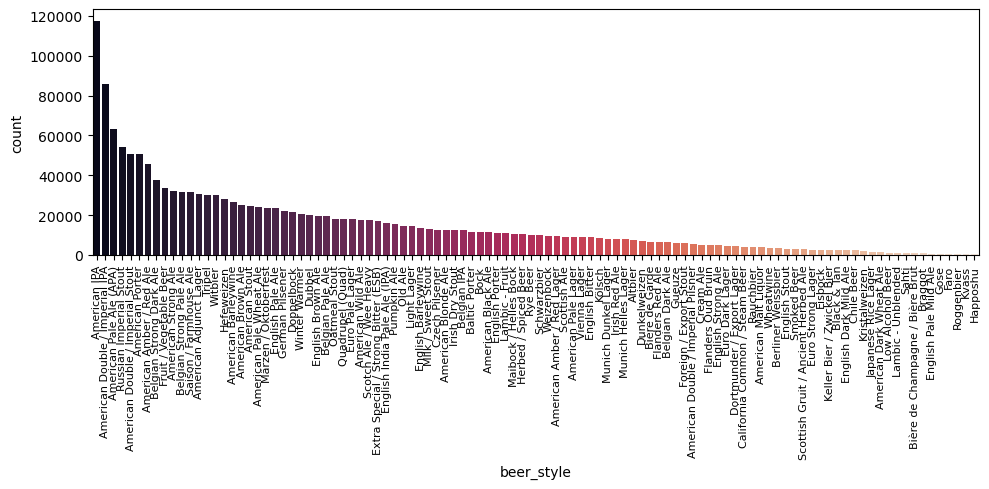

In [ ]:
beer_style_counts_df = pd.DataFrame([beer_style_counter]).T.reset_index()
beer_style_counts_df.columns = ['beer_style', 'count']
beer_style_counts_df = beer_style_counts_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='beer_style', y='count', data=beer_style_counts_df, palette='rocket')
plt.xticks(rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

Generamos el dataframe con las cervezas que solo tienen una evaluacion para eliminarlas del dataset y reducir el numero de cervezas para poder realizar la matriz de similitudes

In [ ]:
beers = beers_df['beer_beerid'].value_counts().to_frame().reset_index()
beers = beers[beers['count'] ==1]
beers

,beer_beerid,count
42315,54375,1
42316,23567,1
42317,38457,1
42318,62325,1
42319,55586,1
...,...,...
66050,12708,1
66051,70915,1
66052,21441,1
66053,62863,1


In [ ]:
beers_df_mat = beers_df[~beers_df['beer_beerid'].isin(beers['beer_beerid'])]
beers_df_mat

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
5,5,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,6,1075,Caldera Brewing Company,1318991115,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,7,1075,Caldera Brewing Company,1306276018,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,8,1075,Caldera Brewing Company,1290454503,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,9,1075,Caldera Brewing Company,1285632924,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


Eliminamos registros duplicados dado que una sola cerveza no cambia su nivel de alcohol ni categoria.

In [ ]:
beers_df_mat = beers_df_mat[['beer_beerid','beer_abv','beer_style']].drop_duplicates()
beers_df_mat=beers_df_mat.set_index('beer_beerid')
beers_df_mat


,beer_abv,beer_style
beer_beerid,,
52159,4.7,Herbed / Spiced Beer
436,3.5,Light Lager
10789,7.2,Oatmeal Stout
58046,7.4,Rauchbier
25414,5.5,American Pale Ale (APA)
...,...,...
34215,5.8,Extra Special / Strong Bitter (ESB)
62147,8.0,Belgian IPA
41749,5.2,Irish Red Ale


dividimos el nivel de alcohol en categorias para reducir el numero de valores a 4 rangos

In [ ]:

bins = [0, 5, 8, 12, 58]
labels = ['Low', 'Medium', 'High', 'Very High']

beers_df_mat['abv_category'] = pd.cut(beers_df_mat['beer_abv'], bins=bins, labels=labels, right=False)
beers_df_mat[['beer_abv','abv_category']]


,beer_abv,abv_category
beer_beerid,,
52159,4.7,Low
436,3.5,Low
10789,7.2,Medium
58046,7.4,Medium
25414,5.5,Medium
...,...,...
34215,5.8,Medium
62147,8.0,High
41749,5.2,Medium


In [ ]:
beers_df_mat = pd.get_dummies(beers_df_mat[['abv_category','beer_style']])


In [ ]:
beers_df_mat

,abv_category_Low,abv_category_Medium,abv_category_High,abv_category_Very High,beer_style_Altbier,beer_style_American Adjunct Lager,beer_style_American Amber / Red Ale,beer_style_American Amber / Red Lager,beer_style_American Barleywine,beer_style_American Black Ale,...,beer_style_Scotch Ale / Wee Heavy,beer_style_Scottish Ale,beer_style_Scottish Gruit / Ancient Herbed Ale,beer_style_Smoked Beer,beer_style_Tripel,beer_style_Vienna Lager,beer_style_Weizenbock,beer_style_Wheatwine,beer_style_Winter Warmer,beer_style_Witbier
beer_beerid,,,,,,,,,,,,,,,,,,,,,
52159,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
436,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10789,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58046,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25414,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34215,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
62147,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41749,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
cosine_sim = cosine_similarity(beers_df_mat, beers_df_mat)
print(f"Las dimensiones de similaridad coseno de las caracteristicas de nuestra matriz de similitud son: {cosine_sim.shape}")

Las dimensiones de similaridad coseno de las caracteristicas de nuestra matriz de similitud son: (42315, 42315)


In [ ]:
numero_recomendaciones=10
sim_scores = list(enumerate(cosine_sim[0]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(numero_recomendaciones+1)]
similar_beers = [i[0] for i in sim_scores]

In [ ]:
similar_beers

[676, 677, 995, 1050, 1151, 2040, 2621, 2904, 2906, 2972]

informacion de la cerveza buscada

In [ ]:
beers_df[beers_df['beer_beerid']==52159][['beer_beerid','beer_style','beer_abv','beer_name']].drop_duplicates()

,beer_beerid,beer_style,beer_abv,beer_name
5,52159,Herbed / Spiced Beer,4.7,Caldera Ginger Beer


Dataframe de informacion de las cervezas

In [ ]:
beers_info = beers_df[['beer_beerid','beer_style','beer_abv','beer_name']].drop_duplicates()

desplegando info de los 10 resultados basados en la matriz de similitudes

In [ ]:
beers_info[beers_info['beer_beerid'].isin(similar_beers)]

,beer_beerid,beer_style,beer_abv,beer_name
100277,2621,English India Pale Ale (IPA),6.30,Old Slipperyskin India Pale Ale
435167,1151,English Brown Ale,5.30,Lakeside British Ale
473990,2906,American IPA,6.70,Butte Creek Organic India Pale Ale
661021,2040,Kölsch,4.80,Reissdorf Kölsch
762184,995,Maibock / Helles Bock,6.00,Mai Bock
1223994,1050,Belgian Pale Ale,5.00,Allagash Speciale Reserve
1256876,2904,American IPA,5.25,New Holland Mad Hatter India Pale Ale
1407662,677,Belgian Pale Ale,5.00,De Koninck


In [ ]:
beer_id = 52159
total_items = beers_info.shape[0]
relevant_items = beers_info['beer_beerid'].unique()
relevant_items = relevant_items[relevant_items != beer_id]

y_true = np.isin(np.arange(total_items), relevant_items).astype(int)
y_pred = np.isin(np.arange(total_items), similar_beers).astype(int)


np.where(y_true != 0)

(array([    3,     4,     5, ..., 66051, 66052, 66053]),)

In [ ]:
# Calcular Precision@k
precision = precision_score(y_true, y_pred, average='binary')
print(f"Precision {numero_recomendaciones}: {precision}")

# Calcular Recall@k
recall = recall_score(y_true, y_pred, average='binary')
print(f"Recall {numero_recomendaciones}: {recall}")

f1 = f1_score(y_true, y_pred, average='binary')
print(f"F1-score {numero_recomendaciones}: {f1}")

Precision 10: 0.8
Recall 10: 0.0001438926560785654
F1-score 10: 0.000287733558724621
